In [1]:
from Wavefront_Storage import Data_Input_Storage
from Wavefront_Generation import Full_Cycle
from Wavefront_Plotting import make_time_interconnect_all, make_fanout_interconnect_all
import Wavefront_Interactive as WI
from copy import copy
from decimal import Decimal 
import builtins
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
# generate a input for an LC osscilator
data_input_LC = Data_Input_Storage(L_time = '13',C_time='7', number_periods = 1.5,show_about = False)
# copy that input for the parallel resistor simulation
data_input_RR = copy(data_input_LC)

In [3]:
# setup a new termination function for the Inductor
R = Decimal('10')
ZL = data_input_RR.Inductor_Impedance
def new_inductor_termination_func(V_arrive,I_arrive):
    V_out = I_arrive * (1/(1/R + 1/ZL)) - V_arrive*ZL/(R +ZL )
    I_out = -(V_out/ZL)
    return V_out, I_out

# and one for the capacitor
ZC = data_input_RR.Capacitor_Impedance
def new_capacitor_termination_func(V_arrive,I_arrive):
    V_out = I_arrive * (1/(1/R + 1/ZC)) - V_arrive*ZC/(R +ZC )
    I_out = -(V_out/ZC)
    
    return V_out, I_out

# replace the old termination funciton
builtins.setattr(data_input_RR, 'Termination_Event_Solver_Inductor',new_inductor_termination_func)
builtins.setattr(data_input_RR, 'Termination_Event_Solver_Capacitor',new_capacitor_termination_func)


In [4]:
# simulate both inputs
interface_LC = Full_Cycle(data_input_LC, show_about = False)
interface_RR = Full_Cycle(data_input_RR, show_about = False)

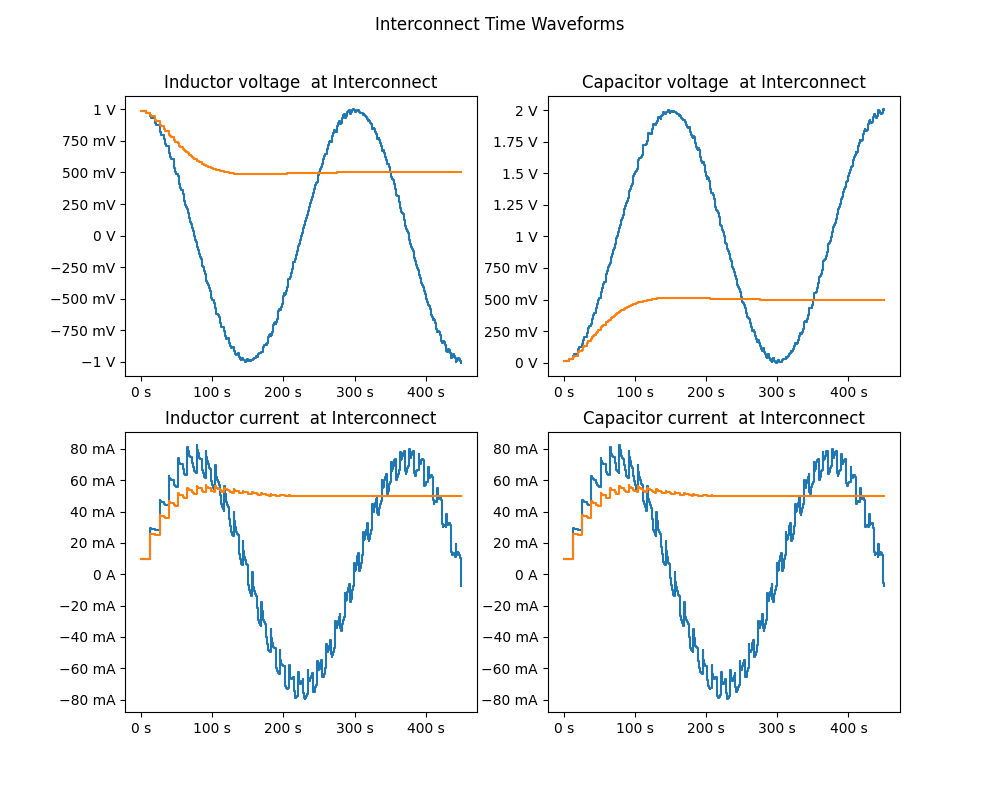

In [5]:
# plot  interconnect data 
fig_1, axes_1 = make_time_interconnect_all(interface_LC)
make_time_interconnect_all(interface_RR,ax = axes_1)

(<Figure size 1000x800 with 8 Axes>,
 {'VC': <AxesSubplot:label='VC', title={'center':'Capacitor Voltage at Interconnect'}, xlabel='L - axis ', ylabel='C - axis '>,
  'IL': <AxesSubplot:label='IL', title={'center':'Inductor Current at Interconnect'}, xlabel='L - axis ', ylabel='C - axis '>,
  'VL': <AxesSubplot:label='VL', title={'center':'Inductor Voltage at Interconnect'}, xlabel='L - axis ', ylabel='C - axis '>,
  'IC': <AxesSubplot:label='IC', title={'center':'Capacitor Current at Interconnect'}, xlabel='L - axis ', ylabel='C - axis '>})

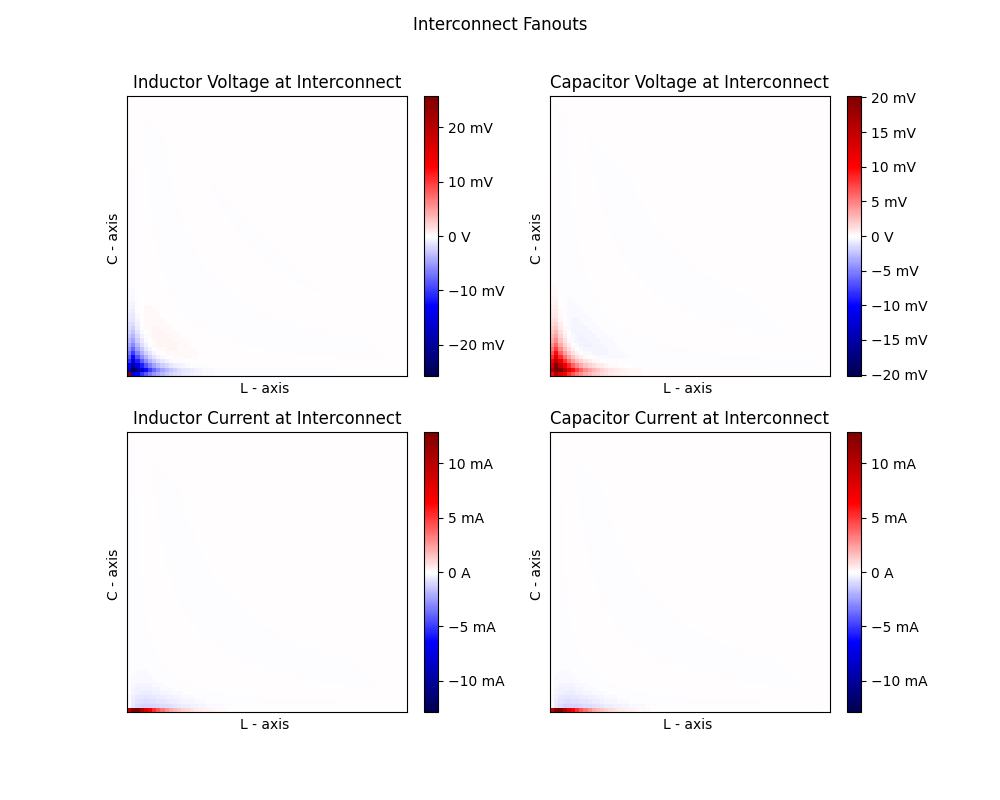

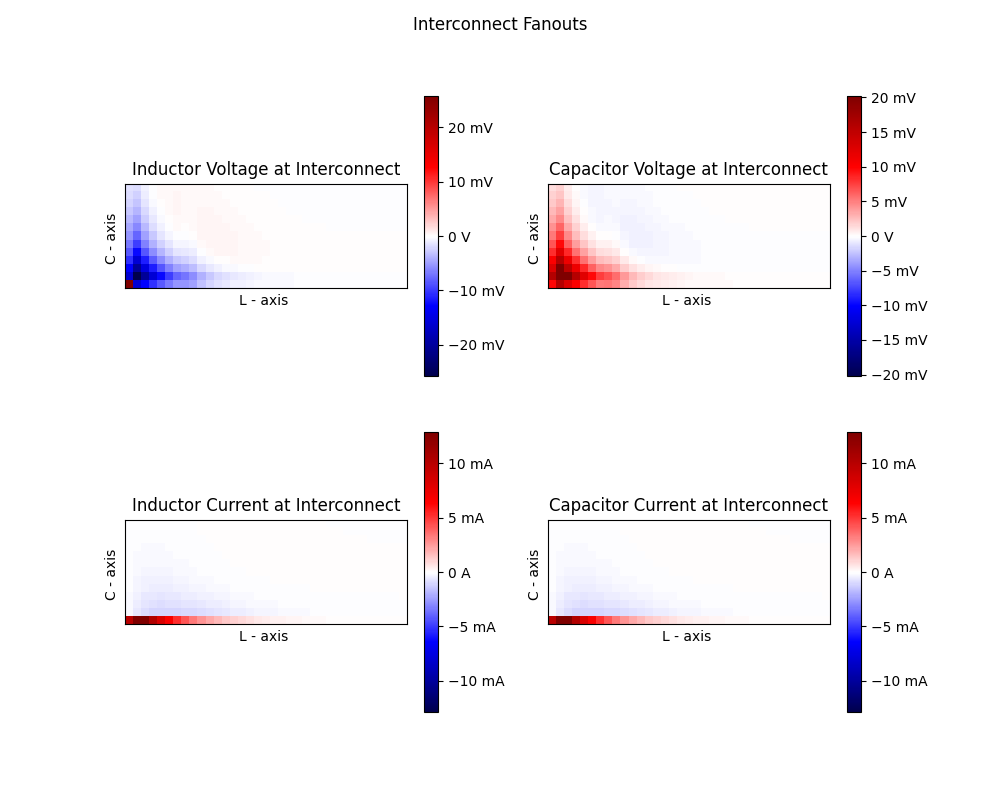

In [6]:
# plot fanouts
make_fanout_interconnect_all(interface_RR.data_output_commutative)
make_fanout_interconnect_all(interface_RR.data_output_multiplicative)

interactive(children=(FloatSlider(value=0.0, description='t', layout=Layout(width='auto'), max=449.53325807144…

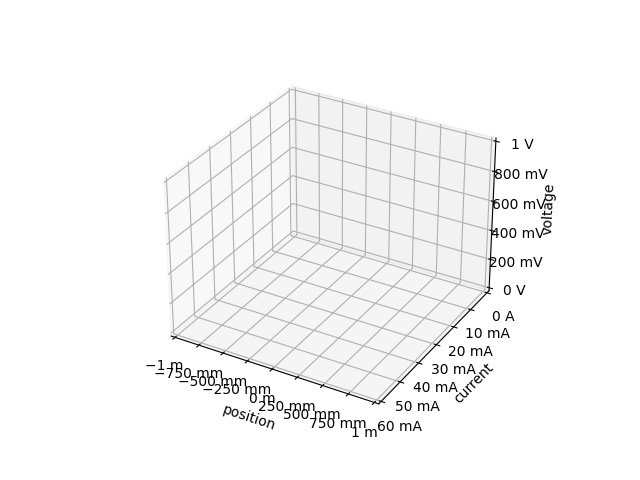

In [7]:
WI.interact_3D_spatial(interface_RR,y_lim =(0,0.06), z_lim= (0,1) )
